# Connect to your google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change your system path
import os
os.chdir('./drive/MyDrive/emb')

In [3]:
os.getcwd()

'/content/drive/MyDrive/emb'

# Read data from your google drive

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/WISDM_ar_v1.1_trans_about.txt
./dataset/WISDM_ar_v1.1_raw.txt
./dataset/WISDM_ar_v1.1_raw_about.txt
./dataset/WISDM_ar_v1.1_transformed.arff
./dataset/readme.txt
./dataset/our_dataset_0527.txt
./dataset/our_dataset.txt


In [5]:
!pip install -q tensorflow-model-optimization
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import tensorflow_model_optimization as tfmot
print(tf.__version__)

     |████████████████████████████████| 237 kB 5.9 MB/s 
2.8.2


#Data Cleaning & Preprocessing
drop null values.

change datatype of the ‘z-axis’ column to float.

drop the rows where the timestamp = 0.

sort data in ascending order of ‘user’ and ‘timestamp’ columns.

In [6]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
# df_har = pd.read_csv('./dataset/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df_har = pd.read_csv('./dataset/our_dataset.txt', header = None, names = columns)
df_har

,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Downstairs,0,-0.144,-0.945,+0.271;
1,37,Downstairs,125000000,-0.132,-0.907,+0.363;
2,37,Downstairs,250000000,-0.104,-0.924,+0.358;
3,37,Downstairs,375000000,-0.021,-0.927,+0.406;
4,37,Downstairs,500000000,-0.130,-0.873,+0.322;
...,...,...,...,...,...,...
29130,42,Standing,3641250000000,-0.018,-1.027,-0.089;
29131,42,Standing,3641375000000,-0.023,-1.021,-0.089;
29132,42,Standing,3641500000000,-0.024,-1.022,-0.089;
29133,42,Standing,3641625000000,-0.023,-1.028,-0.089;


In [7]:
# removing null values
df_har = df_har.dropna()
print(df_har.shape)
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)
df

(29135, 6)


,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Downstairs,125000000,-0.132,-0.907,0.363
1,37,Downstairs,250000000,-0.104,-0.924,0.358
2,37,Downstairs,375000000,-0.021,-0.927,0.406
3,37,Downstairs,500000000,-0.130,-0.873,0.322
4,37,Downstairs,625000000,-0.252,-1.126,0.065
...,...,...,...,...,...,...
29129,42,Standing,3641250000000,-0.018,-1.027,-0.089
29130,42,Standing,3641375000000,-0.023,-1.021,-0.089
29131,42,Standing,3641500000000,-0.024,-1.022,-0.089
29132,42,Standing,3641625000000,-0.023,-1.028,-0.089


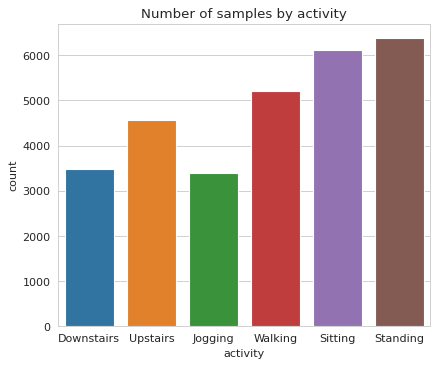

Standing      6382
Sitting       6109
Walking       5208
Upstairs      4561
Downstairs    3484
Jogging       3390
Name: activity, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()
df['activity'].value_counts()

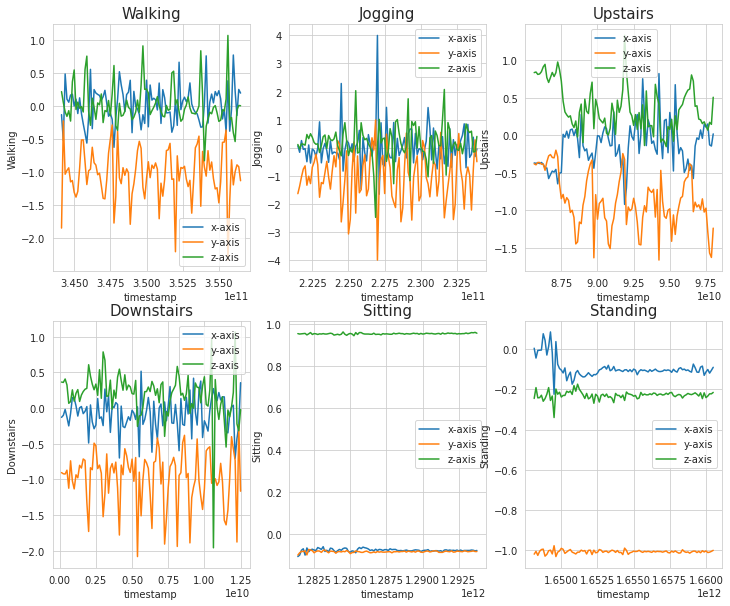

In [9]:
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data36=df[(df['user']==37)&(df['activity']==i)][:100]
  sns.lineplot(y='x-axis',x='timestamp',data=data36)
  sns.lineplot(y='y-axis',x='timestamp',data=data36)
  sns.lineplot(y='z-axis',x='timestamp',data=data36)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
  #plt.savefig(i+'.png')
  
  #plt.show()
plt.show()

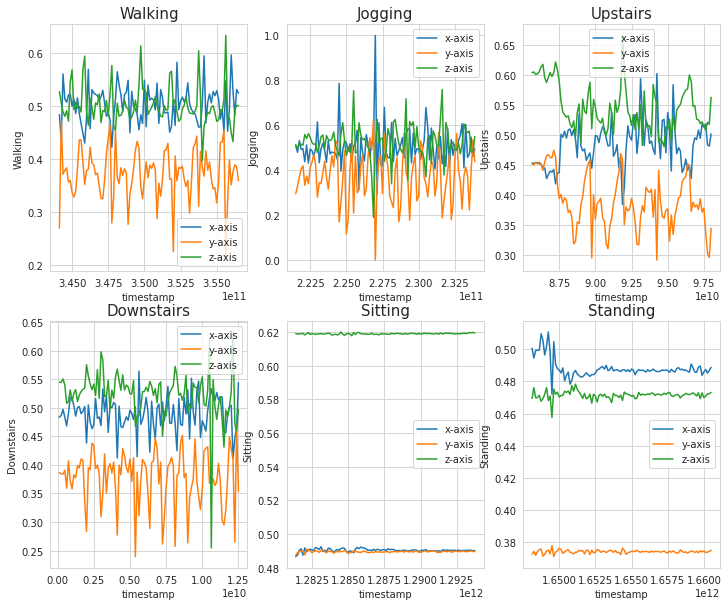

In [10]:
# copy the data
df_max_scaled = df.copy()
# apply normalization techniques
for ind in df_max_scaled.columns:
  if ind == 'x-axis' or ind == 'y-axis' or ind == 'z-axis':
    # df_max_scaled[ind] = (df_max_scaled[ind] + 20) / 40
    df_max_scaled[ind] = (df_max_scaled[ind] + 4) / 8
# indicate 
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data36=df_max_scaled[(df_max_scaled['user']==37)&(df_max_scaled['activity']==i)][:100]
  sns.lineplot(y='x-axis',x='timestamp',data=data36)
  sns.lineplot(y='y-axis',x='timestamp',data=data36)
  sns.lineplot(y='z-axis',x='timestamp',data=data36)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
#plt.savefig(i+'.png')
  #plt.show()
plt.show()

In [11]:
random_seed = 42   
n_time_steps = 50
n_features = 3 
step = 10         
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [12]:
segments = []
labels = []
#數據會有些重疊
window_len = 50
check = []
from scipy import stats
import numpy as np
flag = False
for i in range(0,  df_max_scaled.shape[0]- window_len, 10):  
        
    if df_max_scaled['activity'][i] == df_max_scaled['activity'][i+window_len]:
        flag = True
        for j in range(0,window_len):

            xs = df_max_scaled['x-axis'].values[i+j]  

            ys = df_max_scaled['y-axis'].values[i+j]

            zs = df_max_scaled['z-axis'].values[i+j]

            segments.append([xs, ys, zs])
    else:
        flag = False
    if flag == True:
        label = stats.mode(df_max_scaled['activity'][i: i + window_len])[0][0]

        #segments.append([xs, ys, zs])
        check.append(label)
        labels.append(label)
print( np.asarray(segments, dtype= np.float32).shape)
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, window_len, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

(140950, 3)


In [13]:
class_label =['Downstairs','Jogging',"Sitting","Standing",'Upstairs','Walking']
for act in class_label:
    for index,i in enumerate(check):
        if i == act:
          print (labels[index],check[index])
          break

[1. 0. 0. 0. 0. 0.] Downstairs
[0. 1. 0. 0. 0. 0.] Jogging
[0. 0. 1. 0. 0. 0.] Sitting
[0. 0. 0. 1. 0. 0.] Standing
[0. 0. 0. 0. 1. 0.] Upstairs
[0. 0. 0. 0. 0. 1.] Walking


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = 42)

In [15]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2255, 50, 3, 1), (564, 50, 3, 1), (2255, 6), (564, 6))

# Train model in Python

In [17]:
# model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPooling2D,Reshape,Conv1D,MaxPooling1D,BatchNormalization, InputLayer
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import keras
from tensorflow.keras import optimizers, regularizers
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [18]:
import tensorflow as tf

weight_decay = 1e-4
model = tf.keras.Sequential(
    [
      Conv2D(16, (2, 2), activation="relu",input_shape = X_train[0].shape),
      Dropout(0.1),
     
      Conv2D(32, (2, 2),activation="relu"),
      Dropout(0.2),

      Flatten(),
     
      Dense(64, activation = 'relu'),
      Dropout(0.5),
     
      Dense(6, activation='softmax'),
    ]
  )

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 2, 16)         80        
                                                                 
 dropout (Dropout)           (None, 49, 2, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 1, 32)         2080      
                                                                 
 dropout_1 (Dropout)         (None, 48, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [19]:
model.build((None,50,3,1))
model.compile(optimizer=optimizers.RMSprop(lr=0.001, decay=1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [21]:
history = model.fit(X_train, y_train,batch_size=16 ,epochs = 240, validation_data= (X_test, y_test), verbose=1)

Epoch 1/240
141/141 [==============================] - 13s 6ms/step - loss: 1.6915 - accuracy: 0.3051 - val_loss: 1.3920 - val_accuracy: 0.4344
Epoch 2/240
141/141 [==============================] - 1s 4ms/step - loss: 1.2770 - accuracy: 0.4727 - val_loss: 1.0522 - val_accuracy: 0.5514
Epoch 3/240
141/141 [==============================] - 1s 4ms/step - loss: 1.0434 - accuracy: 0.5725 - val_loss: 0.8856 - val_accuracy: 0.5585
Epoch 4/240
141/141 [==============================] - 1s 5ms/step - loss: 0.8472 - accuracy: 0.6545 - val_loss: 0.5765 - val_accuracy: 0.8103
Epoch 5/240
141/141 [==============================] - 1s 4ms/step - loss: 0.7285 - accuracy: 0.7051 - val_loss: 0.5488 - val_accuracy: 0.7748
Epoch 6/240
141/141 [==============================] - 1s 5ms/step - loss: 0.6353 - accuracy: 0.7326 - val_loss: 0.4241 - val_accuracy: 0.8670
Epoch 7/240
141/141 [==============================] - 1s 5ms/step - loss: 0.5735 - accuracy: 0.7605 - val_loss: 0.5719 - val_accuracy: 0.744

In [28]:
history = model.fit(X_train, y_train,batch_size=16 ,epochs = 20, validation_data= (X_test, y_test), verbose=1)

Epoch 1/20
141/141 [==============================] - 1s 7ms/step - loss: 0.1433 - accuracy: 0.9743 - val_loss: 0.0585 - val_accuracy: 0.9823
Epoch 2/20
141/141 [==============================] - 1s 7ms/step - loss: 0.1226 - accuracy: 0.9663 - val_loss: 0.0961 - val_accuracy: 0.9787
Epoch 3/20
141/141 [==============================] - 1s 9ms/step - loss: 0.1462 - accuracy: 0.9667 - val_loss: 0.0486 - val_accuracy: 0.9894
Epoch 4/20
141/141 [==============================] - 1s 6ms/step - loss: 0.1297 - accuracy: 0.9694 - val_loss: 0.0554 - val_accuracy: 0.9929
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 0.1548 - accuracy: 0.9605 - val_loss: 0.0658 - val_accuracy: 0.9805
Epoch 6/20
141/141 [==============================] - 1s 5ms/step - loss: 0.1542 - accuracy: 0.9645 - val_loss: 0.0631 - val_accuracy: 0.9858
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1389 - accuracy: 0.9698 - val_loss: 0.0672 - val_accuracy: 0.9770
Epoch 

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

1/1 [==============================] - 13s 13s/step - loss: 0.1058 - accuracy: 0.9752
Test Accuracy : 0.9751772880554199
Test Loss : 0.10575208067893982


In [20]:
model.load_weights('model.h5')

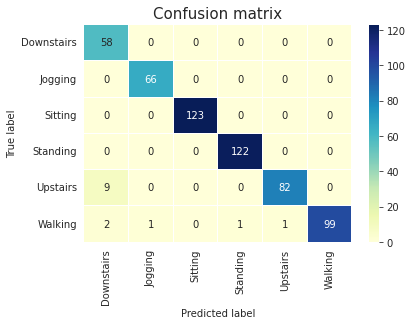

NameError: ignored

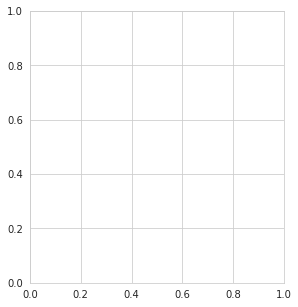

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
from pylab import savefig
predictions = model.predict(X_test)
class_labels =  ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.subplot(1,2,2)
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report((np.argmax(y_test, axis=1)), (np.argmax(predictions, axis=1)), target_names=['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']))

## model pruning

In [23]:
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
initial_sparsity=0.5, final_sparsity=0.8,
begin_step=2000, end_step=4000)

model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(model, pruning_schedule=pruning_schedule)

model_for_pruning.summary()

model_for_pruning.build((None,50,3,1))
model_for_pruning.compile(optimizer=optimizers.RMSprop(lr=0.001, decay=1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 49, 2, 16)        146       
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_dropout  (None, 49, 2, 16)        1         
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_conv2d_  (None, 48, 1, 32)        4130      
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dropout  (None, 48, 1, 32)        1         
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_flatten  (None, 1536)             1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
import tempfile
logdir = tempfile.mkdtemp()
# Callback to update pruning wrappers at each step
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

# Train and prune the model
history = model_for_pruning.fit(X_train, y_train,batch_size=16 ,epochs = 10, validation_data= (X_test, y_test), verbose=1,callbacks=callbacks)

Epoch 1/10
141/141 [==============================] - 14s 17ms/step - loss: 0.1267 - accuracy: 0.9667 - val_loss: 0.0575 - val_accuracy: 0.9876
Epoch 2/10
141/141 [==============================] - 2s 14ms/step - loss: 0.1274 - accuracy: 0.9654 - val_loss: 0.1033 - val_accuracy: 0.9752
Epoch 3/10
141/141 [==============================] - 2s 13ms/step - loss: 0.1211 - accuracy: 0.9716 - val_loss: 0.0821 - val_accuracy: 0.9734
Epoch 4/10
141/141 [==============================] - 1s 7ms/step - loss: 0.1273 - accuracy: 0.9650 - val_loss: 0.0798 - val_accuracy: 0.9716
Epoch 5/10
141/141 [==============================] - 1s 7ms/step - loss: 0.1407 - accuracy: 0.9667 - val_loss: 0.0554 - val_accuracy: 0.9840
Epoch 6/10
141/141 [==============================] - 1s 7ms/step - loss: 0.1325 - accuracy: 0.9592 - val_loss: 0.0907 - val_accuracy: 0.9752
Epoch 7/10
141/141 [==============================] - 1s 8ms/step - loss: 0.1233 - accuracy: 0.9663 - val_loss: 0.0719 - val_accuracy: 0.9716
Ep

In [25]:
loss, accuracy = model_for_pruning.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

1/1 [==============================] - 0s 20ms/step - loss: 0.0546 - accuracy: 0.9858
Test Accuracy : 0.9858155846595764
Test Loss : 0.0546097569167614


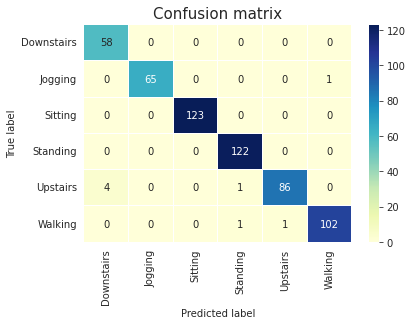

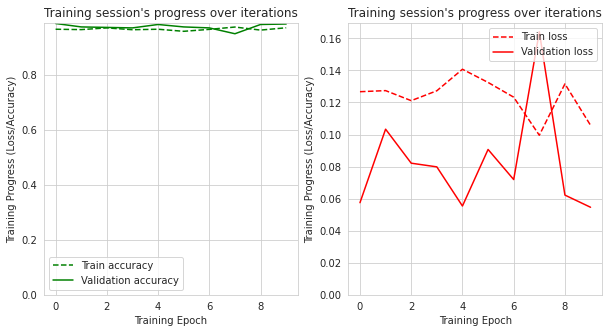


Classification Report

              precision    recall  f1-score   support

  Downstairs       0.94      1.00      0.97        58
     Jogging       1.00      0.98      0.99        66
     Sitting       1.00      1.00      1.00       123
    Standing       0.98      1.00      0.99       122
    Upstairs       0.99      0.95      0.97        91
     Walking       0.99      0.98      0.99       104

    accuracy                           0.99       564
   macro avg       0.98      0.99      0.98       564
weighted avg       0.99      0.99      0.99       564



In [26]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
from pylab import savefig
predictions = model_for_pruning.predict(X_test)
class_labels =  ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.subplot(1,2,2)
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report((np.argmax(y_test, axis=1)), (np.argmax(predictions, axis=1)), target_names=['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']))

# Convert to tf_lite

In [27]:
def representative_dataset_gen():
  for data in tf.data.Dataset.from_tensor_slices((X_test)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

In [28]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning) # this line
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  #[tf.lite.Optimize.DEFAULT]
# converter.experimental_new_converter = True
converter.representative_dataset = representative_dataset_gen
# converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()
converter.inference_input_type, converter.inference_output_type

INFO:tensorflow:Assets written to: /tmp/tmpyeox3mc4/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


(tf.float32, tf.float32)

In [29]:
import pathlib


generated_dir = pathlib.Path("generated/")
generated_dir.mkdir(exist_ok=True, parents=True)
converted_model_file = generated_dir/"model_prnuing.tflite"
converted_model_file.write_bytes(tflite_model)  

105808

In [30]:
import binascii

def convert_to_c_array(bytes) -> str:
  hexstr = binascii.hexlify(bytes).decode("UTF-8")
  hexstr = hexstr.upper()
  array = ["0x" + hexstr[i:i + 2] for i in range(0, len(hexstr), 2)]
  array = [array[i:i+10] for i in range(0, len(array), 10)]
  return ",\n  ".join([", ".join(e) for e in array])

tflite_binary = open(converted_model_file, 'rb').read()
ascii_bytes = convert_to_c_array(tflite_binary)
c_file = "const unsigned char model_tflite[] = {\n  " + ascii_bytes + "\n};\nunsigned int model_tflite_len = " + str(len(tflite_binary)) + ";"
# print(c_file)
open("model.h", "w").write(c_file)

656090

## compressing analysis

In [31]:
final_model = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 2, 16)         80        
                                                                 
 dropout (Dropout)           (None, 49, 2, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 1, 32)         2080      
                                                                 
 dropout_1 (Dropout)         (None, 48, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [32]:
from tensorflow.keras.models import load_model

import numpy as np

for i, w in enumerate(final_model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

conv2d/kernel:0 -- Total:64, Zeros: 0.00%
conv2d/bias:0 -- Total:16, Zeros: 6.25%
conv2d_1/kernel:0 -- Total:2048, Zeros: 0.00%
conv2d_1/bias:0 -- Total:32, Zeros: 0.00%
dense/kernel:0 -- Total:98304, Zeros: 0.00%
dense/bias:0 -- Total:64, Zeros: 0.00%
dense_1/kernel:0 -- Total:384, Zeros: 0.00%
dense_1/bias:0 -- Total:6, Zeros: 0.00%


In [33]:
import tempfile
import zipfile

_, new_pruned_keras_file = tempfile.mkstemp(".h5")
print("Saving pruned model to: ", new_pruned_keras_file)
tf.keras.models.save_model(final_model, new_pruned_keras_file, include_optimizer=False)

# Zip the .h5 model file
_, zip3 = tempfile.mkstemp(".zip")
with zipfile.ZipFile(zip3, "w", compression=zipfile.ZIP_DEFLATED) as f:
    f.write(new_pruned_keras_file)
print(
    "Size of the pruned model before compression: %.2f Mb"
    % (os.path.getsize(new_pruned_keras_file) / float(2 ** 20))
)
print(
    "Size of the pruned model after compression: %.2f Mb"
    % (os.path.getsize(zip3) / float(2 ** 20))
)

Saving pruned model to:  /tmp/tmpe9iqiu0d.h5


Size of the pruned model before compression: 0.41 Mb
Size of the pruned model after compression: 0.36 Mb
